In [1]:
%pylab inline
import os
import gc
import scipy
import smatch
import numpy as np
import catutil as utilities
import imgSimutil as imgUtil
import astropy.io.fits as pyfits
import astropy.io.ascii as ascii
from astropy.table import Table,vstack,hstack
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [1]:
cd wrkDir/FPFS2/sim2_2/

/lustre/work/xiangchong.li/work/FPFS2/sim2_2


In [4]:
def estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002):
    bz1o=(np.average(d2222['e1_z1'],weights=d2222['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2o=(np.average(d2222['e1_z2'],weights=d2222['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3o=(np.average(d2222['e1_z3'],weights=d2222['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4o=(np.average(d2222['e1_z4'],weights=d2222['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    bz1n=(np.average(d2000['e1_z1'],weights=d2000['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2n=(np.average(d0200['e1_z2'],weights=d0200['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3n=(np.average(d0020['e1_z3'],weights=d0020['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4n=(np.average(d0002['e1_z4'],weights=d0002['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    dmz1=bz1n/bz1o-1
    dmz2=bz2n/bz2o-1
    dmz3=bz3n/bz3o-1
    dmz4=bz4n/bz4o-1
    mArray=np.array([dmz1,dmz2,dmz3,dmz4])
    return mArray

def estimate_mArray2(d2222,d0000,d2000,d0200,d0020,d0002):
    bz1o=(np.average(d2222['e1_z1'],weights=d2222['n_z1'])-np.average(d0000['e1_z1'],weights=d0000['n_z1']))/0.04
    bz2o=(np.average(d2222['e1_z2'],weights=d2222['n_z2'])-np.average(d0000['e1_z2'],weights=d0000['n_z2']))/0.04
    bz3o=(np.average(d2222['e1_z3'],weights=d2222['n_z3'])-np.average(d0000['e1_z3'],weights=d0000['n_z3']))/0.04
    bz4o=(np.average(d2222['e1_z4'],weights=d2222['n_z4'])-np.average(d0000['e1_z4'],weights=d0000['n_z4']))/0.04
    bz1o=bz1o*np.sum(d0000['n_z1'])
    bz2o=bz2o*np.sum(d0000['n_z2'])
    bz3o=bz3o*np.sum(d0000['n_z3'])
    bz4o=bz4o*np.sum(d0000['n_z4'])
    
    bz1n=(np.dot(d2000['e1_z1'],d2000['n_z1'])-np.dot(d0000['e1_z1'],d0000['n_z1']))/0.04
    bz2n=(np.dot(d0200['e1_z2'],d0200['n_z2'])-np.dot(d0000['e1_z2'],d0000['n_z2']))/0.04
    bz3n=(np.dot(d0020['e1_z3'],d0020['n_z3'])-np.dot(d0000['e1_z3'],d0000['n_z3']))/0.04
    bz4n=(np.dot(d0002['e1_z4'],d0002['n_z4'])-np.dot(d0000['e1_z4'],d0000['n_z4']))/0.04
    dmz1=bz1n/bz1o-1
    dmz2=bz2n/bz2o-1
    dmz3=bz3n/bz3o-1
    dmz4=bz4n/bz4o-1
    mArray=np.array([dmz1,dmz2,dmz3,dmz4])
    return mArray

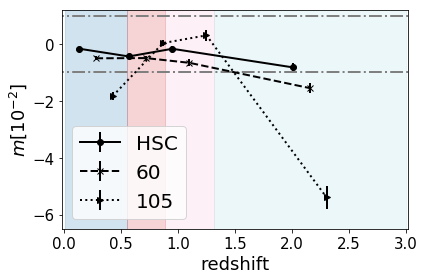

In [45]:
pltDir='plot/cosmozBlending/'
if not os.path.isdir(pltDir):
    os.mkdir(pltDir)
    
Dir='outCosmoR-var36em4/mag245-res03-bm38/'
lList=['HSC','60','105']
#zbound  =   np.array([0.,0.561,0.906,1.374,5.410])
zbound  =   np.array([0.005,0.5477,0.8874,1.3119,3.0]) #sim 3

bAll=[]
errAll=[]
for psz in lList:
    err=[]
    fname=os.path.join(Dir,'e1_g1-2222_psf%s.fits' %psz)
    d2222=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0000_psf%s.fits' %psz)
    d0000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-2000_psf%s.fits' %psz)
    d2000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0200_psf%s.fits' %psz)
    d0200=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0020_psf%s.fits' %psz)
    d0020=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0002_psf%s.fits' %psz)
    d0002=pyfits.getdata(fname)
    mArray=estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002)
    bAll.append(mArray)
    ngroup=len(d0000)
    for ig in range(1000):
        d2222c=np.delete(d2222,ig)
        d0000c=np.delete(d0000,ig)
        d2000c=np.delete(d2000,ig)
        d0200c=np.delete(d0200,ig)
        d0020c=np.delete(d0020,ig)
        d0002c=np.delete(d0002,ig)
        mArrayc=estimate_mArray(d2222c,d0000c,d2000c,d0200c,d0020c,d0002c)
        err.append(mArrayc-mArray)
        del d2222c,d0000c,d2000c,d0200c,d0020c,d0002c,mArrayc
        gc.collect()
    errAll.append(np.sqrt(np.sum(np.vstack(err)**2.,axis=0)))
    del err,mArray
    gc.collect()

lsList=['o-','x--','>:']
ishift=[-0.15,0,0.15]
for i in range(len(lList)):
    plt.errorbar((zbound[:-1]+zbound[1:])/2.+ishift[i],bAll[i]*100,errAll[i]*100,ls=lsList[i][1:],\
                 marker=lsList[i][0],label=lList[i],c='black')
cmap = cm.tab20
norm = Normalize(vmin=0, vmax=len(zbound)-2)
for iz in range(len(zbound)-1):
    cc=cmap(norm(iz))
    plt.axvspan(zbound[iz],zbound[iz+1],alpha=0.2, color=cc)
plt.plot(np.linspace(-0.12,5.43,20),-0.98*np.ones(20),c='grey',ls='-.')
plt.plot(np.linspace(-0.12,5.43,20),0.98*np.ones(20),c='grey',ls='-.')
plt.legend(loc='lower left')
plt.ylabel(r'$m [10^{-2}]$')
plt.xlabel('redshift')
plt.xlim(-0.02,3.02)
plt.ylim(-6.5,1.2)
plt.tight_layout()
np.save(os.path.join(Dir,'bAll.npy'),bAll)
np.save(os.path.join(Dir,'errAll.npy'),errAll)
plt.savefig(os.path.join(pltDir,'%s-%s.png' %tuple(Dir.split('/')[:-1])))
plt.savefig(os.path.join(pltDir,'%s-%s.pdf' %tuple(Dir.split('/')[:-1])))

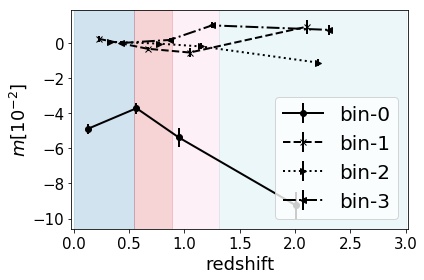

In [44]:
pltDir='plot/cosmozBlending/'
if not os.path.isdir(pltDir):
    os.mkdir(pltDir)
    
lList=['60']
zbound  =   np.array([0.005,0.5477,0.8874,1.3119,3.0]) #sim 3


bAll=[]
errAll=[]
for ids in range(1,5):
    Dir='outCosmoR-var36em4/mag245-res03-bm38-dis%d/' %ids
    err=[]
    fname=os.path.join(Dir,'e1_g1-2222_psf%s.fits' %psz)
    d2222=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0000_psf%s.fits' %psz)
    d0000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-2000_psf%s.fits' %psz)
    d2000=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0200_psf%s.fits' %psz)
    d0200=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0020_psf%s.fits' %psz)
    d0020=pyfits.getdata(fname)
    fname=os.path.join(Dir,'e1_g1-0002_psf%s.fits' %psz)
    d0002=pyfits.getdata(fname)
    mArray=estimate_mArray(d2222,d0000,d2000,d0200,d0020,d0002)
    bAll.append(mArray)
    ngroup=len(d0000)
    for ig in range(1000):
        d2222c=np.delete(d2222,ig)
        d0000c=np.delete(d0000,ig)
        d2000c=np.delete(d2000,ig)
        d0200c=np.delete(d0200,ig)
        d0020c=np.delete(d0020,ig)
        d0002c=np.delete(d0002,ig)
        mArrayc=estimate_mArray(d2222c,d0000c,d2000c,d0200c,d0020c,d0002c)
        err.append(mArrayc-mArray)
        del d2222c,d0000c,d2000c,d0200c,d0020c,d0002c,mArrayc
        gc.collect()
    errAll.append(np.sqrt(np.sum(np.vstack(err)**2.,axis=0)))
    del err,mArray
    gc.collect()

lsList=['o-','x--','>:','<-.']
ishift=[-0.15,-0.05,0.05,0.15]
for i in range(4):
    plt.errorbar((zbound[:-1]+zbound[1:])/2.+ishift[i],bAll[i]*100,errAll[i]*100,ls=lsList[i][1:],\
                 marker=lsList[i][0],label='bin-%d' %i,c='black')
cmap = cm.tab20
norm = Normalize(vmin=0, vmax=len(zbound)-2)
for iz in range(len(zbound)-1):
    cc=cmap(norm(iz))
    plt.axvspan(zbound[iz],zbound[iz+1],alpha=0.2, color=cc)
plt.legend(loc='lower right')
plt.ylabel(r'$m [10^{-2}]$')
plt.xlabel('redshift')
plt.xlim(-0.02,3.02)
#plt.ylim(-6.5,1.2)
plt.tight_layout()
np.save(os.path.join(Dir,'bAll.npy'),bAll)
np.save(os.path.join(Dir,'errAll.npy'),errAll)
plt.savefig(os.path.join(pltDir,'%s-%s.png' %tuple(Dir.split('/')[:-1])))
plt.savefig(os.path.join(pltDir,'%s-%s.pdf' %tuple(Dir.split('/')[:-1])))

4324
5210


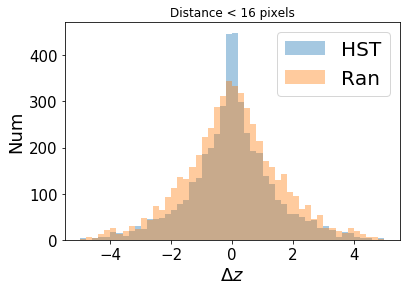

In [23]:
norm=False
disThres=16.
plt.close()
hstcat =    pyfits.getdata('hstcatE.fits')
xyRef   =   np.vstack([hstcat['xI'],hstcat['yI']]).T
tree    =   scipy.spatial.cKDTree(xyRef)
dis1,inds=tree.query(xyRef,k=2)
msk=dis1[:,1]<disThres
print(np.sum(msk))
Dz1=hstcat[inds[:,1][msk]]['zphot']-hstcat[msk]['zphot']
hist1,bin1,_=plt.hist(Dz1,alpha=0.4,label='HST',bins=50,range=(-5,5),normed=norm)

hstcat =    pyfits.getdata('hstcatR.fits')
xyRef   =   np.vstack([hstcat['xI'],hstcat['yI']]).T
tree    =   scipy.spatial.cKDTree(xyRef)
dis2,inds=tree.query(xyRef,k=2)
msk=dis2[:,1]<disThres
print(np.sum(msk))
Dz2=hstcat[inds[:,1][msk]]['zphot']-hstcat[msk]['zphot']
hist2,bin2,_2=plt.hist(Dz2,alpha=0.4,label='Ran',bins=50,range=(-5,5),normed=norm)
bcent=(bin1[1:]+bin1[:-1])/2.
plt.xlabel(r'$\Delta z$')
plt.ylabel('Num')
plt.title('Distance < 16 pixels')
plt.legend()

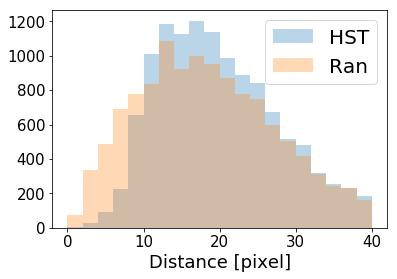

In [30]:
plt.hist(dis1[:,1],bins=20,alpha=0.3,range=(0,40),label='HST')
plt.hist(dis2[:,1],bins=20,alpha=0.3,range=(0,40),label='Ran')
plt.legend()
plt.xlabel('Distance [pixel]')

hstcat =    pyfits.getdata('hstcatR.fits')
xyRef   =   np.vstack([hstcat['xI'],hstcat['yI']]).T
tree    =   scipy.spatial.cKDTree(xyRef)
dis2,inds=tree.query(xyRef,k=2)
dbd=np.array([0,8,16,24,32])
for ii in range(4):
    msk=(dis2[:,1]>dbd[ii])&(dis2[:,1]<=dbd[ii+1])
    pyfits.writeto('hstcatR-dis%d.fits' %(ii+1),hstcat[msk])
    del msk
    gc.collect()

Exponential fitting: sigma=0.189, flux=61.52


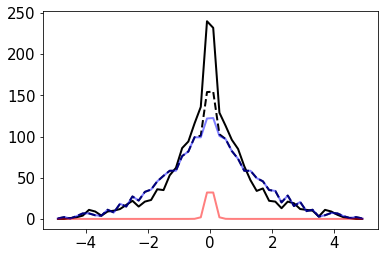

In [174]:
def func(x,a,b,c):
    return a*np.exp(-b * np.abs(x))+c*hist2
plt.plot(bcent,hist1,c='black')
plt.plot(bcent,func(bcent,*popt),c='black',ls='--')
plt.plot(bcent,popt[0]*np.exp(-popt[1]* np.abs(bcent)),c='red',alpha=0.5)
print(r'Exponential fitting: sigma=%.3f, flux=%.2f' %(np.sqrt(1./popt[1]/2.),popt[0]*np.sqrt(np.pi/popt[1])))
plt.plot(bcent,popt[2]*hist2,c='blue',alpha=0.5)